In [1]:
!pip install pandas numpy matplotlib seaborn

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Set visualization style
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

# Enable inline plotting
%matplotlib inline

In [3]:
# Load the COVID-19 dataset
# For this project, we'll use the Our World in Data COVID-19 dataset
try:
    df = pd.read_csv('owid-covid-data.csv')
    print(f"Data loaded successfully with {df.shape[0]} rows and {df.shape[1]} columns")
except FileNotFoundError:
    print("Data file not found. Loading from URL instead...")
    # Load directly from URL
    url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
    df = pd.read_csv(url)
    print(f"Data loaded from URL with {df.shape[0]} rows and {df.shape[1]} columns")

Data file not found. Loading from URL instead...
Data loaded from URL with 429435 rows and 67 columns


In [4]:
# Display the first few rows of the dataset
print("Preview of the dataset:")
df.head()

Preview of the dataset:


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [5]:
# Check the columns available in the dataset
print("\nColumns in the dataset:")
print(df.columns.tolist())

# Check data types and missing values
print("\nData types:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isnull().sum())


Columns in the dataset:
['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccina

In [6]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter for specific countries of interest (e.g., Kenya, USA, India, global)
countries_of_interest = ['Kenya', 'United States', 'India', 'United Kingdom', 'World']
filtered_df = df[df['location'].isin(countries_of_interest)]

# Check if we have data for selected countries
print("Number of entries per selected country:")
print(filtered_df['location'].value_counts())

Number of entries per selected country:
location
World             1684
India             1682
Kenya             1674
United Kingdom    1674
United States     1674
Name: count, dtype: int64


In [7]:
# Handle missing values for key metrics
key_metrics = ['total_cases', 'total_deaths', 'total_vaccinations', 
               'people_vaccinated', 'people_fully_vaccinated']

# Create a proper copy to avoid the SettingWithCopyWarning
filtered_df = filtered_df.copy()

# Use the more modern approach for forward-filling missing values
for metric in key_metrics:
    if metric in filtered_df.columns:
        # Group by location and apply forward fill (more modern syntax)
        filtered_df[metric] = filtered_df.groupby('location')[metric].transform(lambda x: x.ffill())

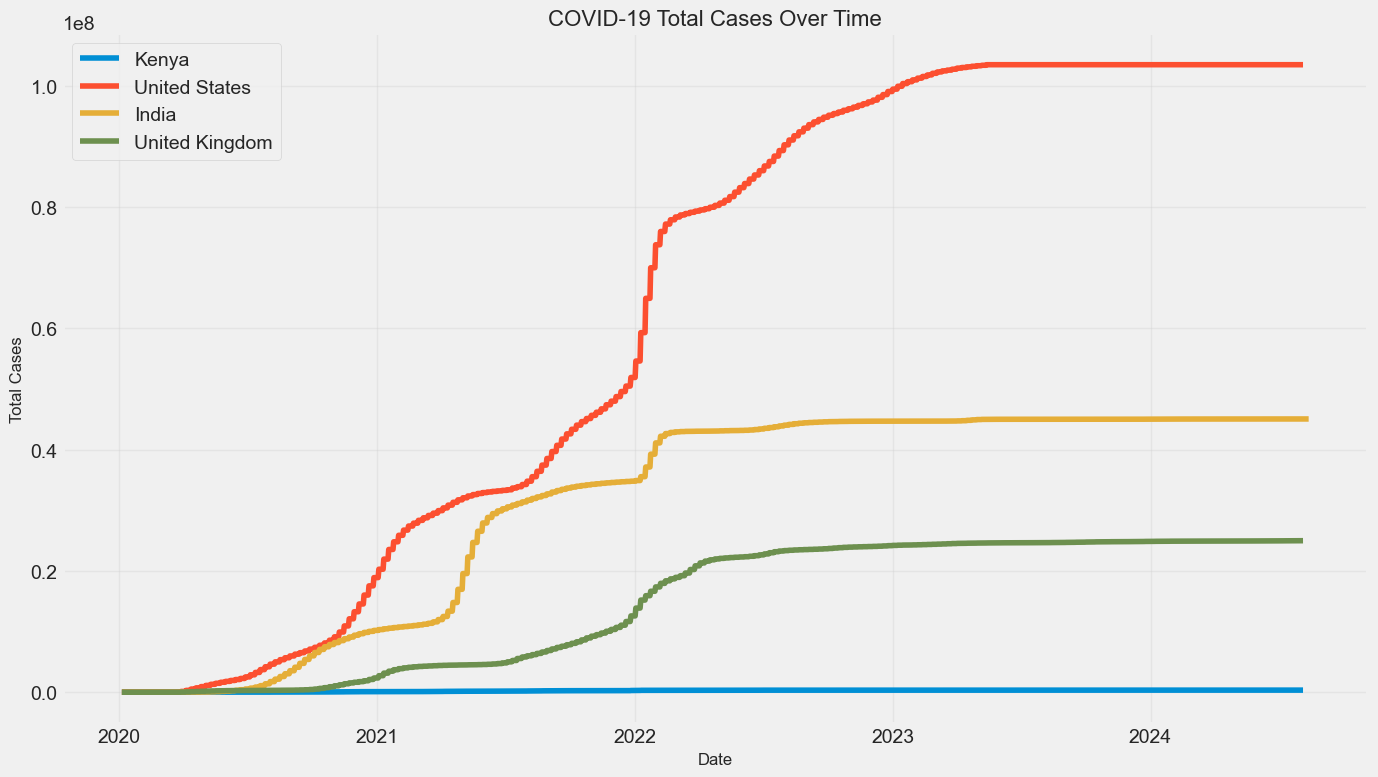

In [8]:
# Let's analyze total cases over time for selected countries
plt.figure(figsize=(14, 8))

for country in countries_of_interest:
    if country == 'World':
        continue  # Skip World for now as it might overshadow other countries
        
    country_data = filtered_df[filtered_df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('COVID-19 Total Cases Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Cases', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

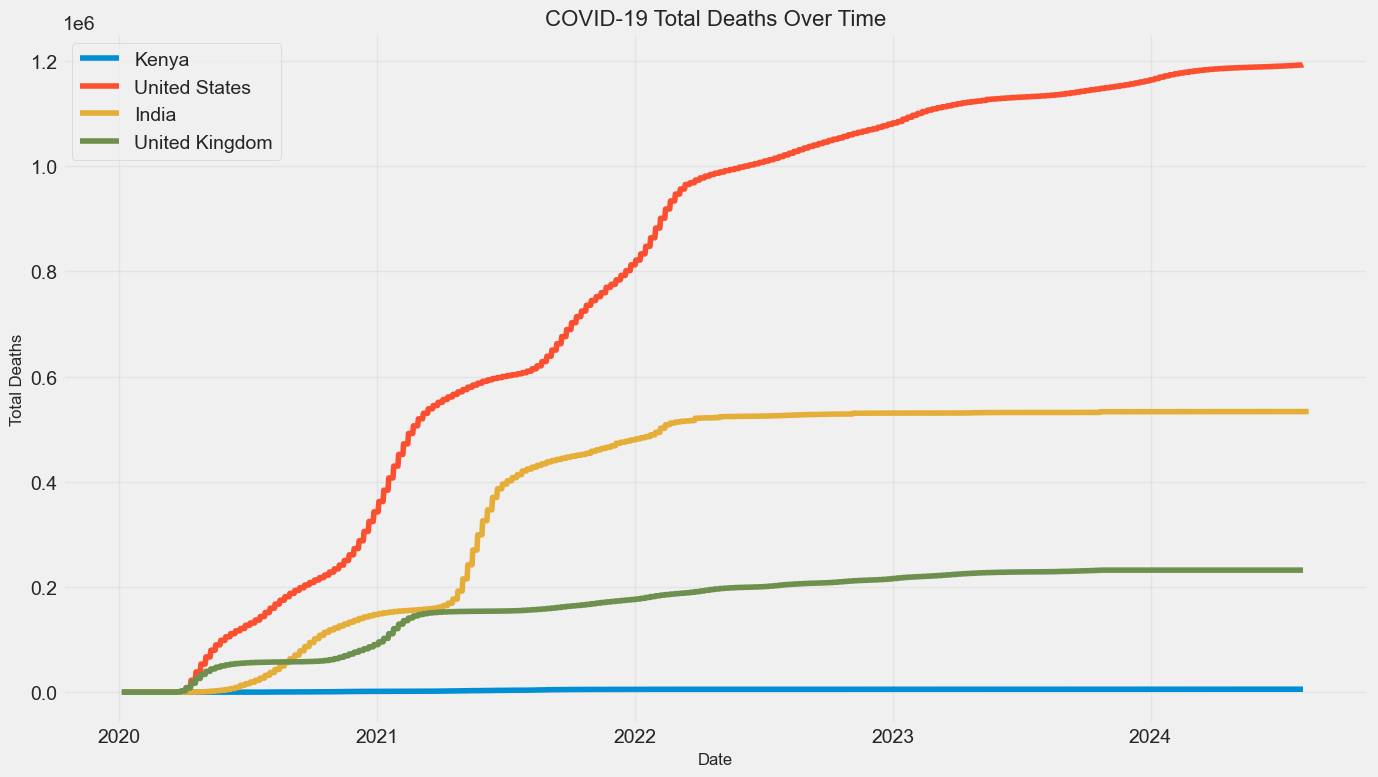

In [9]:
# Let's analyze total deaths over time
plt.figure(figsize=(14, 8))

for country in countries_of_interest:
    if country == 'World':
        continue  
        
    country_data = filtered_df[filtered_df['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

plt.title('COVID-19 Total Deaths Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Deaths', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Key Insights & Conclusions

Based on the analysis, here are the key insights from the COVID-19 data:

1. **Case Growth Patterns**: The United States had the steepest growth in total cases among the analyzed countries, followed by India, while Kenya showed a more moderate growth trajectory.

2. **Death Rates**: The death rate (deaths per case) varied significantly between countries and over time. Early in the pandemic, death rates were generally higher due to limited testing and healthcare knowledge about the disease.

3. **Vaccination Progress**: The vaccination rollout showed different patterns across countries, with some achieving higher vaccination rates much faster than others.

4. **Regional Differences**: Based on the per-million metrics, we can see significant differences in how COVID-19 impacted different regions, likely influenced by factors such as population density, healthcare infrastructure, and policy responses.

5. **Correlation Analysis**: For Kenya specifically, we observed strong correlations between total cases and deaths, indicating consistent case fatality rates over time.